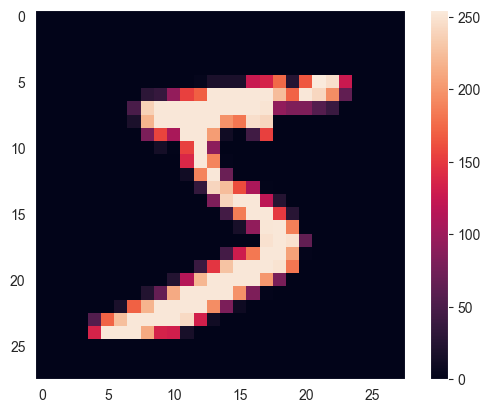

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset (Handwritten digits)
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Class names are simply digits 0-9
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Inspect the first image in the training set
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

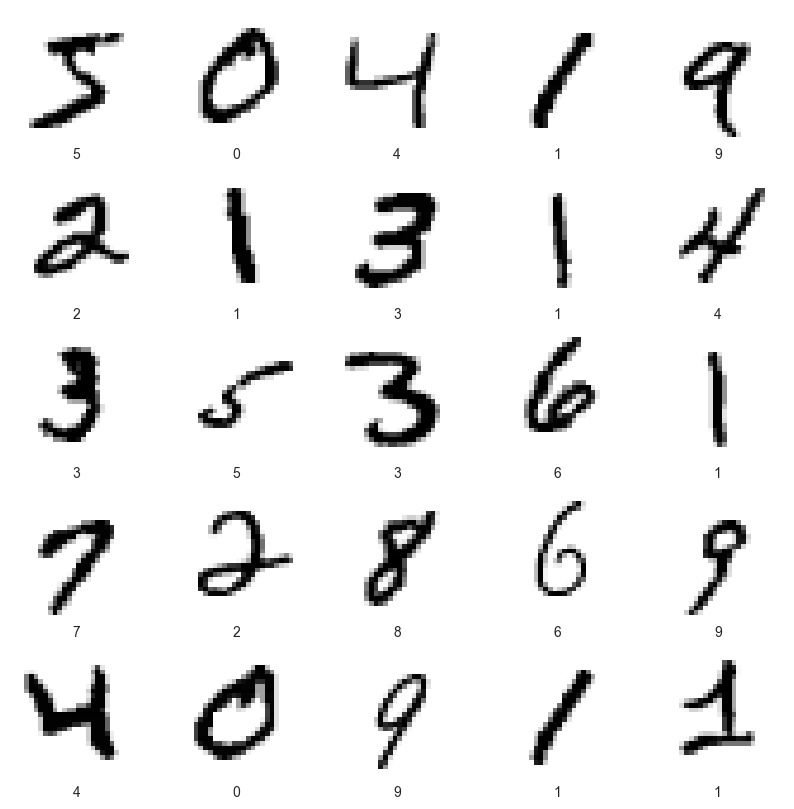

In [12]:
# Scale values to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Display the first 25 images to verify the format
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
# Set up the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Transform 2D array to 1D array
    tf.keras.layers.Dense(128, activation='relu'), # Densely connected layer
    tf.keras.layers.Dense(10)                      # Output layer (returns logits for 10 classes)
])

C:\Users\kiril\PycharmProjects\ArtificialIntelligence2Course\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9265 - loss: 0.2582
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9661 - loss: 0.1152
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9761 - loss: 0.0787
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9818 - loss: 0.0591
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9860 - loss: 0.0454
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9889 - loss: 0.0358
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9908 - loss: 0.0292
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9929 - loss: 0.0233
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9946 - loss: 0.0179
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9947 - loss: 0.0166


In [16]:
# Compare how the model performs on the test dataset
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.9778 - loss: 0.0821

Test accuracy: 0.9778000116348267


In [17]:
# Attach a softmax layer to convert logits to probabilities
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

# Check the first prediction
print(predictions[0])
print("Predicted label:", np.argmax(predictions[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
[2.6901367e-10 2.4862227e-11 4.2716131e-08 7.6389733e-07 2.2410012e-15
 1.2151641e-12 4.4546363e-16 9.9999595e-01 1.1000787e-09 3.3760577e-06]
Predicted label: 7


In [18]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

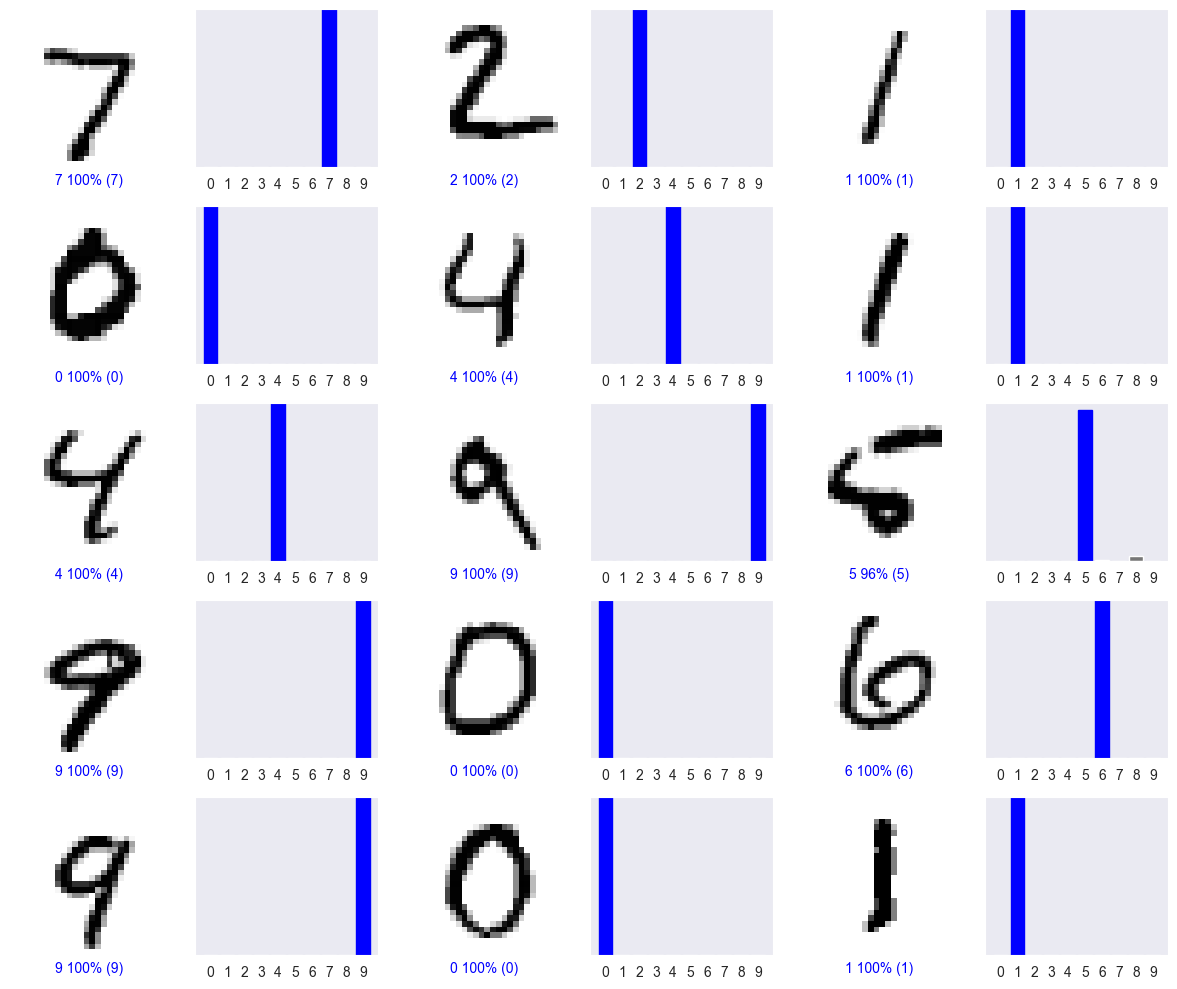

In [19]:
# Plot the first X test images, their predicted labels, and the true labels.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[7.23877935e-13 4.63482174e-05 9.99953628e-01 1.14838254e-08
  2.59349799e-20 1.92307031e-10 1.08205580e-11 6.90525909e-18
  2.07134376e-09 1.99161375e-15]]


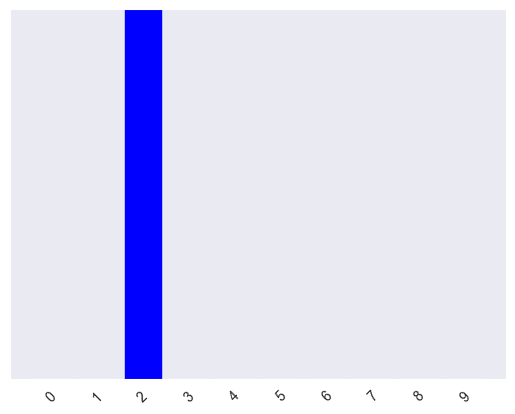

Predicted class: 2


In [20]:
# Grab an image from the test dataset.
img = test_images[1]

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

# Predict the correct label for this image
predictions_single = probability_model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

print("Predicted class:", class_names[np.argmax(predictions_single[0])])